## $I. Data Preparation:$

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
path = '/content/gdrive/MyDrive/Data/Hangtieudung.csv'

In [ ]:
df = pd.read_csv(path) 
df = df.dropna()
df.head(10) 

,Unnamed: 0,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,...,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,snapshot_date,vietnameseName
0,0,TSC,2021-12-01,15:12:03,HOSE,STOCK,18.50,19.75,17.25,18.55,...,16.522,5479900.0,1.007037e+11,0.0,0.000000e+00,0.10,0.0899,0.5405,2021-12-01,Hàng tiêu dùng
1,1,VCF,2021-12-01,15:12:03,HOSE,STOCK,246.00,263.20,228.80,246.00,...,0.000,0.0,0.000000e+00,0.0,0.000000e+00,0.00,0.0000,0.0000,2021-12-01,Hàng tiêu dùng
2,4,LAF,2021-12-01,15:12:03,HOSE,STOCK,23.00,24.60,21.40,23.30,...,23.360,3500.0,8.176000e+07,0.0,0.000000e+00,0.30,0.3000,1.3043,2021-12-01,Hàng tiêu dùng
3,20,NHT,2021-12-03,15:12:06,HOSE,STOCK,36.90,39.45,34.35,36.90,...,30.540,15400.0,5.644250e+08,0.0,0.000000e+00,-0.70,-0.5833,-1.8970,2021-12-03,Hàng tiêu dùng
4,24,BHN,2021-12-01,15:12:03,HOSE,STOCK,61.90,66.20,57.60,61.90,...,59.606,5200.0,3.222100e+08,0.0,0.000000e+00,0.00,0.0000,0.0000,2021-12-01,Hàng tiêu dùng
5,25,FTM,2021-12-01,15:12:03,HOSE,STOCK,5.93,6.34,5.52,5.90,...,6.070,951500.0,5.773719e+09,0.0,0.000000e+00,0.13,0.1300,2.1922,2021-12-01,Hàng tiêu dùng
6,26,HNG,2021-12-01,15:12:03,HOSE,STOCK,8.82,9.43,8.21,8.71,...,8.850,5890700.0,5.212342e+10,0.0,0.000000e+00,0.07,0.0700,0.7937,2021-12-01,Hàng tiêu dùng
7,27,SAB,2021-12-01,15:12:03,HOSE,STOCK,154.00,164.70,143.30,158.00,...,152.931,52000.0,8.127500e+09,30000.0,4.941000e+09,2.50,2.4461,1.6234,2021-12-01,Hàng tiêu dùng
8,60,VTJ,2021-12-03,15:12:08,HNX,STOCK,7.80,8.50,7.10,7.80,...,7.532,18013.0,1.356714e+08,0.0,0.000000e+00,0.00,0.0000,0.0000,2021-12-03,Hàng tiêu dùng
9,66,TFC,2021-12-03,15:12:08,HNX,STOCK,10.70,11.70,9.70,11.00,...,9.773,2000.0,2.154000e+07,0.0,0.000000e+00,0.00,0.0000,0.0000,2021-12-03,Hàng tiêu dùng


In [ ]:
df_technical = df[df['code'].isin(['VSN','FBA','BVN','TET','SGC'])]
df_technical = df_technical.sort_values(by = ['code'],ascending=True)
df_technical['snapshot_date'] = pd.to_datetime(df_technical['snapshot_date'], format = '%Y-%m-%d')
df_technical.head(10)

,Unnamed: 0,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,...,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,snapshot_date,vietnameseName
126429,845147,BVN,2017-04-03,15:04:01,UPCOM,STOCK,7.5,8.6,6.4,7.5,...,6.646,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2017-04-03,Hàng tiêu dùng
128764,861754,BVN,2017-11-23,15:11:01,UPCOM,STOCK,8.2,9.4,7.0,8.2,...,7.760,5000.0,41150000.0,0.0,0.0,0.3,0.2829,3.6585,2017-11-23,Hàng tiêu dùng
35581,234111,BVN,2019-08-29,15:08:01,UPCOM,STOCK,12.8,14.7,10.9,12.8,...,12.800,2500.0,32000000.0,0.0,0.0,0.0,0.0000,0.0000,2019-08-29,Hàng tiêu dùng
35407,233010,BVN,2019-07-15,15:07:01,UPCOM,STOCK,13.0,18.2,7.8,13.0,...,13.000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2019-07-15,Hàng tiêu dùng
128777,861868,BVN,2017-12-19,15:12:01,UPCOM,STOCK,8.0,9.2,6.8,8.0,...,7.543,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2017-12-19,Hàng tiêu dùng
62860,411984,BVN,2020-05-27,15:05:01,UPCOM,STOCK,11.7,16.3,7.1,11.7,...,11.700,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2020-05-27,Hàng tiêu dùng
128978,863256,BVN,2017-12-28,15:12:01,UPCOM,STOCK,8.0,9.2,6.8,8.0,...,7.543,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2017-12-28,Hàng tiêu dùng
129429,866453,BVN,2017-12-27,15:12:01,UPCOM,STOCK,8.0,9.2,6.8,8.0,...,7.543,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2017-12-27,Hàng tiêu dùng
129700,868535,BVN,2017-11-16,15:11:01,UPCOM,STOCK,8.2,9.4,7.0,8.2,...,7.732,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2017-11-16,Hàng tiêu dùng
129984,870443,BVN,2017-11-09,15:11:01,UPCOM,STOCK,8.8,10.1,7.5,8.8,...,8.298,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2017-11-09,Hàng tiêu dùng


In [ ]:
df_candle_stick = df_technical[['code','snapshot_date','open','high','low','close','nmVolume']]
df_candle_stick.head()

,code,snapshot_date,open,high,low,close,nmVolume
126429,BVN,2017-04-03,7.5,7.5,7.5,7.5,0.0
128764,BVN,2017-11-23,8.2,8.5,8.2,8.5,5000.0
35581,BVN,2019-08-29,12.8,12.8,12.8,12.8,2500.0
35407,BVN,2019-07-15,13.0,13.0,13.0,13.0,0.0
128777,BVN,2017-12-19,8.0,8.0,8.0,8.0,0.0


In [ ]:
df_VSN = df_candle_stick[df_candle_stick['code']=='VSN']
df_BVN = df_candle_stick[df_candle_stick['code']=='BVN']
df_FBA = df_candle_stick[df_candle_stick['code']=='FBA']
df_TET = df_candle_stick[df_candle_stick['code']=='TET']
df_SGC = df_candle_stick[df_candle_stick['code']=='SGC']

In [ ]:
df_VSN = df_VSN.sort_values(by='snapshot_date')
df_TET = df_TET.sort_values(by='snapshot_date')
df_SGC = df_SGC.sort_values(by='snapshot_date')
df_FBA = df_FBA.sort_values(by='snapshot_date')
df_BVN = df_BVN.sort_values(by='snapshot_date')

In [ ]:
df_VSN.to_csv("/content/gdrive/MyDrive/Data/df_VSN.csv",index=False)
df_BVN.to_csv("/content/gdrive/MyDrive/Data/df_BVN.csv",index=False)
df_FBA.to_csv("/content/gdrive/MyDrive/Data/df_FBA.csv",index=False)
df_TET.to_csv("/content/gdrive/MyDrive/Data/df_TET.csv",index=False)
df_SGC.to_csv("/content/gdrive/MyDrive/Data/df_SGC.csv",index=False)

In [ ]:
lst = [df_VSN,df_FBA,df_BVN,df_TET,df_SGC]

## $II. Candle Stick:$

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

def candlestick(df):
  fig = go.Figure(data=[go.Candlestick(x=df.snapshot_date,
                  open=df['open'],
                  high=df['high'],
                  low=df['low'],
                  close=df['close'])])
  
  fig.show()

In [ ]:
for df in lst:
  df = df.sort_values(by='snapshot_date',ascending=True) 
  candlestick(df)

In [ ]:
df_FBA = df_FBA.set_index('snapshot_date')
df_VSN = df_VSN.set_index('snapshot_date')
df_SGC = df_SGC.set_index('snapshot_date')
df_TET = df_TET.set_index('snapshot_date')
df_BVN = df_BVN.set_index('snapshot_date')

## $III. MA:$

Popular MA window values are: 5-10-20-50. In this examinat

In [ ]:
#MA: 
def moving_average(df, window):
  return pd.DataFrame(df['close'].rolling(window=window).mean())

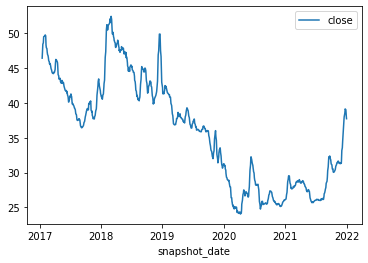

In [ ]:
sns.lineplot(data = moving_average(df_VSN,10))

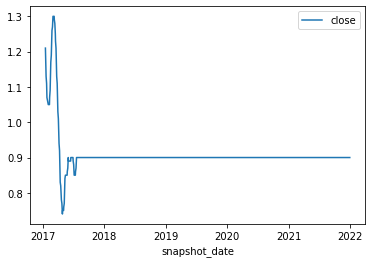

In [ ]:
sns.lineplot(data = moving_average(df_FBA,10))

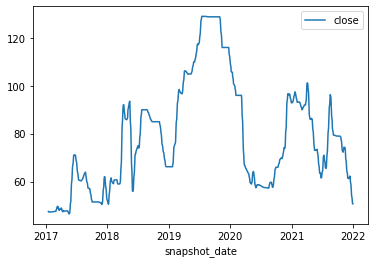

In [ ]:
sns.lineplot(data = moving_average(df_SGC,10))

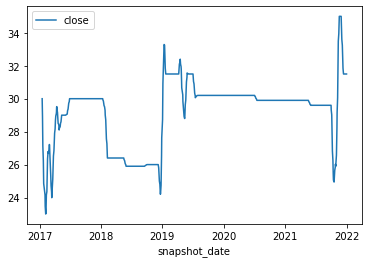

In [ ]:
sns.lineplot(data = moving_average(df_TET,10))

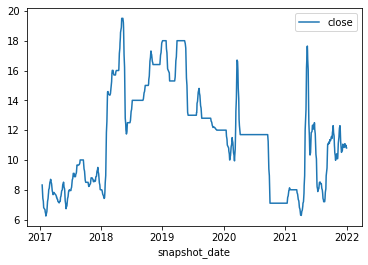

In [ ]:
sns.lineplot(data = moving_average(df_BVN,10))

## $IV. RSI:$

In [ ]:
# Calculate relative strength index (RSI)

# def relative_strength_index(df, window):
#   delta = df['close'].diff()
#   gain = delta.where(delta > 0, 0)
#   loss = delta.where(delta < 0, 0)
#   avg_gain = gain.rolling(window=window).mean()
#   avg_loss = loss.rolling(window=window).mean()
#   rs = avg_gain / avg_loss
#   return 100 - (100 / (1 + rs))

#=> this function shared the same way with the same meaning with below function. However, the result went wrong.

In [ ]:
def rsi(df, window):  
  delta = df['close'].diff()
  gain = delta.clip(lower=0)
  loss = -1*delta.clip(upper=0)
  ema_gain = gain.ewm(com=window, adjust=False).mean()
  ema_loss = loss.ewm(com=window, adjust=False).mean()
  rs = ema_gain/ema_loss
  return 100-(100/(1+rs))

Here we choose 14 days period for RSI indicators:

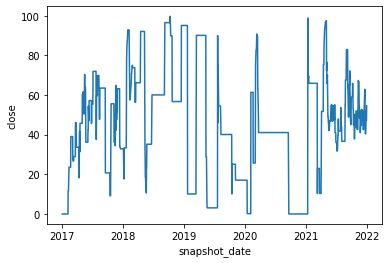

In [ ]:
sns.lineplot(data = rsi(df_BVN,14))

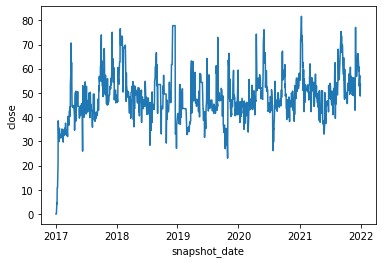

In [ ]:
sns.lineplot(data = rsi(df_VSN,14))

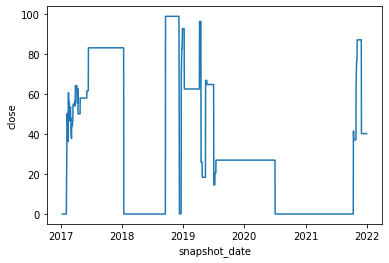

In [ ]:
sns.lineplot(data = rsi(df_TET,14))

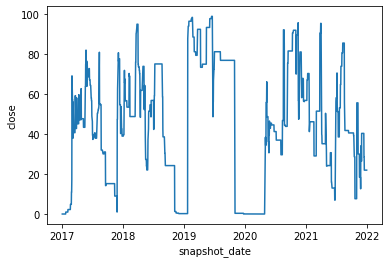

In [ ]:
sns.lineplot(data = rsi(df_SGC,14))

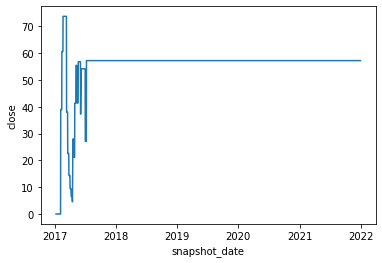

In [ ]:
sns.lineplot(data = rsi(df_FBA,14))

## $V. nmVolumn:$

In [ ]:
from datetime import * 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import Line
 
def lineplt(df):
  fig = make_subplots(rows=2, cols=1,subplot_titles=('close','nmVolume'))

  fig.add_trace(
      Line(x=df.snapshot_date, y=df.close),
      row=1, col=1
  )

  fig.add_trace(
      Line(x=df.snapshot_date, y=df.nmVolume),
      row=2, col=1
  )

  fig.update_layout(height=1400, width=1000, title_text="Basic Line Plots")

  fig.show()

for df in lst:
  df = df.sort_values(by='snapshot_date',ascending=True) 
  lineplt(df)

/usr/local/lib/python3.8/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## $VI. Return:$ 


In [ ]:
#Calculate daily and monthly return:

def Daily_return(df):
  return pd.DataFrame(df['close'].pct_change())
def Monthly_return(df):
  return pd.DataFrame(df['close'].resample('M').ffill().pct_change())

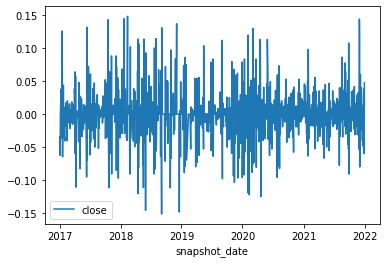

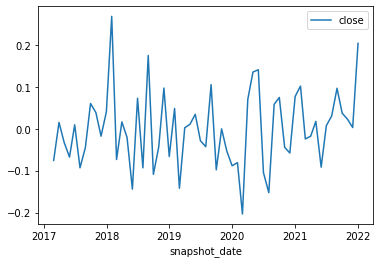

In [ ]:
sns.lineplot(data = Daily_return(df_VSN))
plt.show()
sns.lineplot(data = Monthly_return(df_VSN))

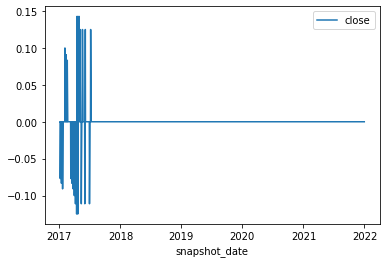

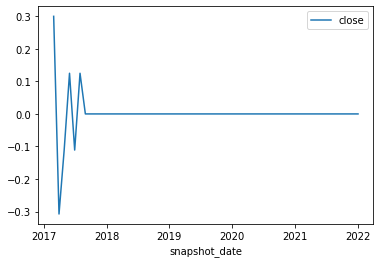

In [ ]:
sns.lineplot(data = Daily_return(df_FBA))
plt.show()
sns.lineplot(data = Monthly_return(df_FBA))

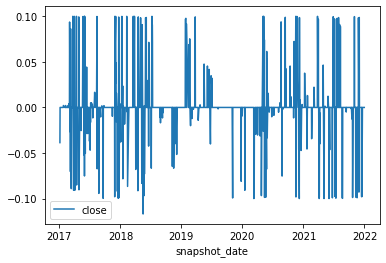

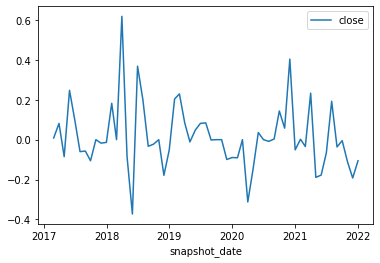

In [ ]:
sns.lineplot(data = Daily_return(df_SGC))
plt.show()
sns.lineplot(data = Monthly_return(df_SGC))

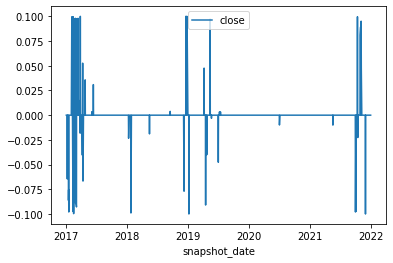

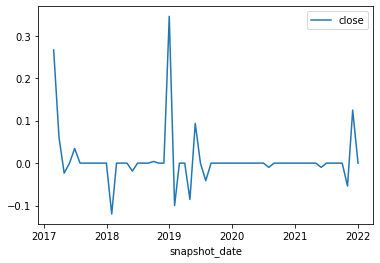

In [ ]:
sns.lineplot(data = Daily_return(df_TET))
plt.show()
sns.lineplot(data = Monthly_return(df_TET))

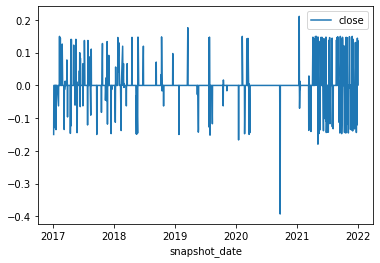

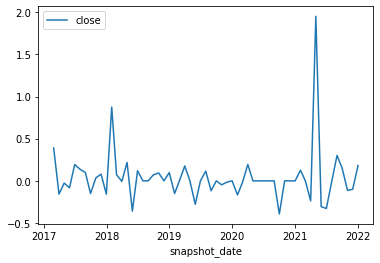

In [ ]:
sns.lineplot(data = Daily_return(df_BVN))
plt.show()
sns.lineplot(data = Monthly_return(df_BVN))